In [3]:
# -----------------------------------------
# 0. Imports
# -----------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, timedelta
from src.utils.ccrfcd.gridded_products import CCRFCDGriddedProducts

# -----------------------------------------
# 1. Grab gauge data for a 1-h window
# -----------------------------------------
gp = CCRFCDGriddedProducts()
t0 = datetime(year=2024, month=7, day=14, hour=6)
t1 = datetime(year=2024, month=7, day=14, hour=18)

# list[(Location, precip)]
pts = gp._fetch_all_gauge_qpe(t0, t1) 

# -----------------------------------------
# 2. Bin onto 1 km grid ➜ grid_mean
# -----------------------------------------
grid_mean = gp._grid_all_gauge_qpe(pts)  # 2-D array, inches

# Re-create the bin edges so we know where each row / col lives
lat_bins = np.arange(gp._LAT_MIN, gp._LAT_MAX + gp._DLAT, gp._DLAT)
lon_bins = np.arange(gp._LON_MIN, gp._LON_MAX + gp._DLON, gp._DLON)

  3%|▎         | 8/231 [00:00<00:03, 74.02it/s]

100%|██████████| 231/231 [00:02<00:00, 79.41it/s]


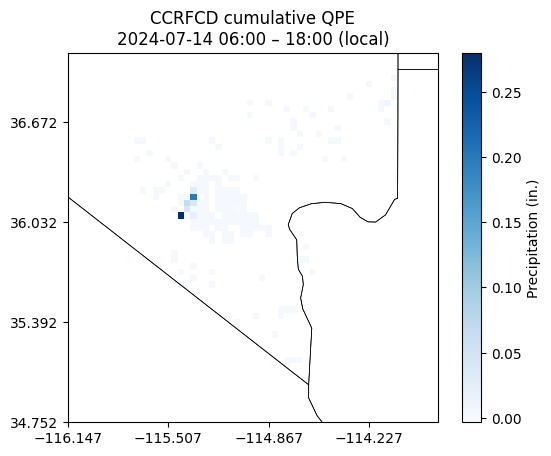

In [12]:
def plot_precip_grid(grid, lat_edges, lon_edges, title="CCRFCD 1-h QPE (in.)"):
    """
    Show a gridded precipitation field on top of a CONUS map.
    """
    
    # build 2-D mesh of cell corners for pcolormesh
    lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

    ax = plt.axes(projection=ccrs.PlateCarree(), )

    # focus only on the grid extent (helps performance)
    ax.set_extent(
        [lon_edges.min(), lon_edges.max(), lat_edges.min(), lat_edges.max()],
        crs=ccrs.PlateCarree(),
    )

    # background context
    ax.add_feature(cfeature.STATES.with_scale("50m"), lw=0.5, edgecolor="black")
    ax.add_feature(cfeature.COASTLINE.with_scale("50m"), lw=0.5)

    # mask NaNs so they don’t plot
    pcm = ax.pcolormesh(
        lon2d, lat2d, grid, cmap="Blues", shading="auto", transform=ccrs.PlateCarree()
    )
    plt.colorbar(pcm, ax=ax, label="Precipitation (in.)")

    ax.set_title(title)
    ax.set_xticks(lon_edges[::16])
    ax.set_yticks(lat_edges[::16])
    
    plt.show()


plot_precip_grid(
    grid_mean,
    lat_bins,
    lon_bins,
    title=f"CCRFCD cumulative QPE\n{t0:%Y-%m-%d %H:%M} – {t1:%H:%M} (local)",
)